<a href="https://www.kaggle.com/code/lucaspaiva/mot1vs3?scriptVersionId=101600858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

# História fictícia

Podemos assumir que a emopresa considereva que o motor tinha uma durabilidade baixa e por isso construiram o motor 3.
Para descobrir se o novo motor de fato possui maior durabilidade, vários dados foram coletados visando comparar os dois motores. 

## Será que existe diferença entre o tempo de falha dos motores 1 e 3?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

In [3]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

In [4]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]

In [5]:
colors = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

In [6]:
motor_1 = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD001.txt", sep= "\s+", header = None,names=columns )
motor_1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
motor_3 = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD003.txt", sep= "\s+", header = None,names=columns )
motor_3.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [8]:
print(motor_1.shape, motor_3.shape)

(20631, 26) (24720, 26)


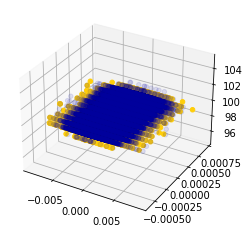

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(motor_1['op1'], motor_1['op2'], motor_1['op3'],'ok',color=colors[-2],alpha=1)
ax.scatter(motor_3['op1'], motor_3['op2'], motor_3['op3'],'.r',color=colors[1],alpha=.1)


#### Filtrando o tempo de ciclo máximo de cada motor

In [10]:
motor_1 = motor_1.groupby('id').max().reset_index()
motor_1['op'] = round((motor_1['op1']+ motor_1['op2']+ motor_1['op3']),0).astype(str)



motor_3 = motor_3.groupby('id').max().reset_index()
motor_3['op'] = round((motor_3['op1']+ motor_3['op2']+ motor_3['op3']),0).astype(str)

print(motor_1.shape, motor_3.shape)


(100, 27) (100, 27)


### Quando calculamos a média, observamos que o motor 2 possui maior duração que o motor 1. 
### Vamos observar o histograma:

In [11]:
print(motor_1.mean()['cycle'],motor_3.mean()['cycle'])

206.31 247.2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


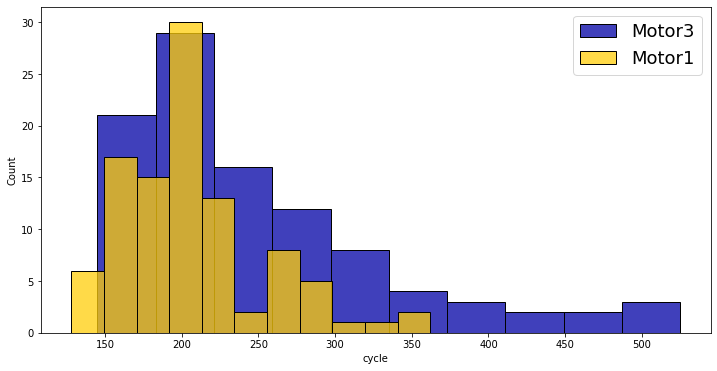

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(motor_3, x='cycle',color=colors[1])
sns.histplot(motor_1, x='cycle',color=colors[-2])

plt.legend(["Motor3", "Motor1"],fontsize=18)

**Aparentemente não existe diferença entre os motores, mesmo com a média de 3 sendo maior.**

**Para testar vamos primeiro verificar a normalidade das distribuições**

## Observando a normalidade das distribuições


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


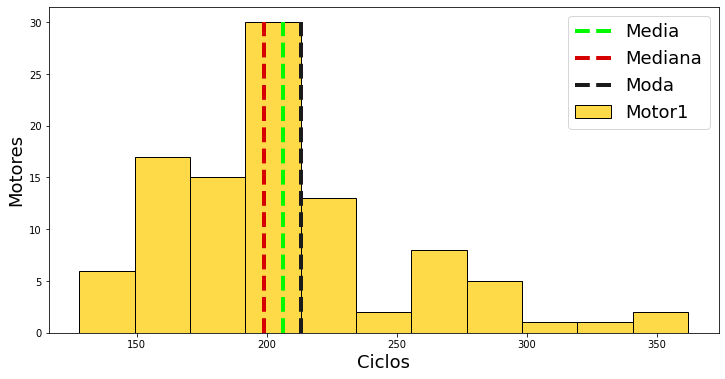

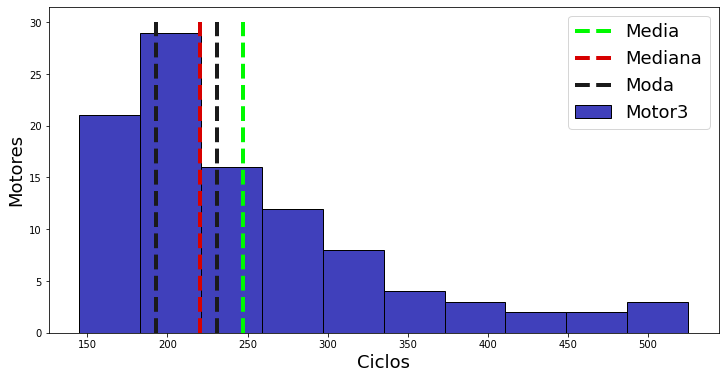

In [13]:
#motor 1
plt.figure(figsize=(12,6))
sns.histplot(motor_1, x='cycle',color=colors[-2])
plt.vlines(motor_1.mean()['cycle'], 0, 30, colors=colors[3],linestyles='dashed', linewidth=4)#  'dashed', 'dashdot', 'dotted'
plt.vlines(motor_1.median()['cycle'], 0, 30, colors=colors[4],linestyles='dashed', linewidth=4)
plt.vlines(motor_1.mode()['cycle'], 0, 30, colors=colors[6],linestyles='dashed', linewidth=4)

plt.xlabel('Ciclos',fontsize=18)
plt.ylabel('Motores',fontsize=18)

plt.legend(["Media","Mediana",'Moda',"Motor1"],fontsize=18)


#motor 2
plt.figure(figsize=(12,6))
sns.histplot(motor_3, x='cycle',color=colors[1])
plt.vlines(motor_3.mean()['cycle'], 0, 30, colors=colors[3],linestyles='dashed', linewidth=4)#  'dashed', 'dashdot', 'dotted'
plt.vlines(motor_3.median()['cycle'], 0, 30, colors=colors[4],linestyles='dashed', linewidth=4)
plt.vlines(motor_3.mode()['cycle'], 0, 30, colors=colors[6],linestyles='dashed', linewidth=4)

plt.xlabel('Ciclos',fontsize=18)
plt.ylabel('Motores',fontsize=18)

plt.legend(["Media","Mediana",'Moda',"Motor3"],fontsize=18)

#### A falta de coincidência entre média, mediana e moda, para as duas distribuições sugerem ausencia de normalidade. 
#### Vamos verificar com um teste.

### Teste de normalidade

**Para o teste de normalidade, assumimos que:**

**h0: a distribuição é normal**

**ha: a distribuição não é normal**

In [14]:
k2, p = stats.normaltest(motor_1['cycle'].values)
print("p_value motor 1", p)

k2, p = stats.normaltest(motor_3['cycle'].values)
print("p_value motor 3", p)

p_value motor 1 9.248271635353651e-05
p_value motor 3 6.314410643782917e-07


#### Para os dois motores devemos rejeitar h0, portanto, ambos seguem uma distribuição que não é normal

## Teste de hipotese para comparar a durabilidade dos motores
Hipoteses:
* h0: não existe diferença entre 1 e 3
* h1: o motor 1 tem durabilidade menor do que o 3

Como as distribuições não são normais, vamos necessitar de um teste não-paramétrico. 

Precisamos destacar que as amostras são de mesmo tamanho e que são independentes 

Devido a isso utilizaremos o teste Mann-Whitney

In [15]:
U1, p = mannwhitneyu(motor_3['cycle'].values,motor_1['cycle'].values,  method="exact",alternative="greater")
print("p_value:",p)

p_value: 0.0005099377086220265


### **Portanto, como p<0.05, podemos rejeitar a hipotese nula e afirmar que o motor 3 tem durabilidade estatisticamente maior do que o motor 1**